PROCESAMIENTO DE LENGUAJE NATURAL

PRACTICA 2

FLORES LARA ALBERTO

5BV1

PARTE 2. VECTORIZACIÓN DE DOCUMENTOS

1. Obtener los documentos resultado de una etapa de normalización. En específico, después de:
a. Convertir cada palabra a minúscula y de remover las “stop-words” y signos de puntuación.
b. Aplicar la técnica de “stemming”.
c. Aplicar POS-Tagging
d. Aplicar “lemmatization”.

In [242]:
#Definimos las librerias que vamos a utilizar provenientes de nltk
import re
import math
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
import matplotlib.pyplot as plt

a. Convertir cada palabra a minúscula y de remover las “stop-words” y signos de puntuación.

In [243]:
# Definimos todas las funciones que vamos a ocupar
# Definimos una funcion para obtener los documentos previamente almacenados en archivos txt 
def obtenertxt(documento):
    with open(documento, 'r', encoding='utf-8') as archivo:
        Texto=archivo.read()
    return Texto

# Definimos una funcion para convertir cada palabra a minusculas
def minusculas(texto):
    Texto_minusculas=texto.lower()
    return Texto_minusculas

# Definimos una funcion para quitar todos los caracteres especiales
def caracteresesp(texto):
    Texto_sin_caracteres=re.sub(r'[^a-zA-Z0-9\s]', '', texto)
    return Texto_sin_caracteres

# Definimos una funcion para quitar todas las stopwords
def stooopwords(tokens):
    # Se inicializa el conjunto de stopwords en inglés.
    stop_words = set(stopwords.words('english'))

    # Se crea una lista para almacenar los tokens sin stopwords.
    texto_sin_stopword = []

    # Se almacenan los tokens que no son stopwords.
    for w in tokens:
        if w not in stop_words:
            texto_sin_stopword.append(w)
            
    return texto_sin_stopword

# Definimos una funcion para tokenizar los documentos
def tokenizar(texto):
    tokens = word_tokenize(texto)
    return tokens

doc1=obtenertxt('Doc1.txt')
doc2=obtenertxt('Doc2.txt')
doc3=obtenertxt('Doc3.txt')

doc1=caracteresesp(doc1)
doc2=caracteresesp(doc2)
doc3=caracteresesp(doc3)

Estos son los documentos originales:

In [244]:
print(doc1)
print(doc2)
print(doc3)

Pancreatic cancer with metastasis Jaundice with transaminitis evaluate for obstruction process
Pancreatitis Breast cancer No output from enteric tube Assess tube
Metastasis pancreatic cancer Acute renal failure evaluate for hydronephrosis or obstructive uropathy


Estos son los documentos con minusculas:

In [245]:
doc1=minusculas(doc1)
doc2=minusculas(doc2)
doc3=minusculas(doc3)

print(doc1)
print(doc2)
print(doc3)

pancreatic cancer with metastasis jaundice with transaminitis evaluate for obstruction process
pancreatitis breast cancer no output from enteric tube assess tube
metastasis pancreatic cancer acute renal failure evaluate for hydronephrosis or obstructive uropathy


Estos son los documentos sin caracteres especiales:

In [246]:
doc1=caracteresesp(doc1)
doc2=caracteresesp(doc2)
doc3=caracteresesp(doc3)

print(doc1)
print(doc2)
print(doc3)

pancreatic cancer with metastasis jaundice with transaminitis evaluate for obstruction process
pancreatitis breast cancer no output from enteric tube assess tube
metastasis pancreatic cancer acute renal failure evaluate for hydronephrosis or obstructive uropathy


Estos son los tokens de cada documento:

In [247]:
tokens1=tokenizar(doc1)
tokens2=tokenizar(doc2)
tokens3=tokenizar(doc3)

print(tokens1)
print(tokens2)
print(tokens3)

#Creamos una copia de los tokens ya que lo usaremos despues
tokens1_copy= tokens1
tokens2_copy= tokens2
tokens3_copy= tokens3

['pancreatic', 'cancer', 'with', 'metastasis', 'jaundice', 'with', 'transaminitis', 'evaluate', 'for', 'obstruction', 'process']
['pancreatitis', 'breast', 'cancer', 'no', 'output', 'from', 'enteric', 'tube', 'assess', 'tube']
['metastasis', 'pancreatic', 'cancer', 'acute', 'renal', 'failure', 'evaluate', 'for', 'hydronephrosis', 'or', 'obstructive', 'uropathy']


Estos son los tokens sin stopwords:

In [248]:
tokens1=stooopwords(tokens1)
tokens2=stooopwords(tokens2)
tokens3=stooopwords(tokens3)

print(tokens1)
print(tokens2)
print(tokens3)

['pancreatic', 'cancer', 'metastasis', 'jaundice', 'transaminitis', 'evaluate', 'obstruction', 'process']
['pancreatitis', 'breast', 'cancer', 'output', 'enteric', 'tube', 'assess', 'tube']
['metastasis', 'pancreatic', 'cancer', 'acute', 'renal', 'failure', 'evaluate', 'hydronephrosis', 'obstructive', 'uropathy']


b. Aplicar la técnica de “stemming”.

In [249]:
# Se nicializa la funcion para realizar stemming.
ps = PorterStemmer()

def stemming(tokens):
    # Se crea una lista para almacenar los tokens con stemming.
    stemming_list=[]
    # Se almacenan los tokens con stemming aplicado.
    for words in tokens:
        stemming_list.append(ps.stem(words))
    return stemming_list

tokens1=stemming(tokens1)
tokens2=stemming(tokens2)
tokens3=stemming(tokens3)

print(tokens1)
print(tokens2)
print(tokens3)

['pancreat', 'cancer', 'metastasi', 'jaundic', 'transamin', 'evalu', 'obstruct', 'process']
['pancreat', 'breast', 'cancer', 'output', 'enter', 'tube', 'assess', 'tube']
['metastasi', 'pancreat', 'cancer', 'acut', 'renal', 'failur', 'evalu', 'hydronephrosi', 'obstruct', 'uropathi']


c. Aplicar POS-Tagging

In [250]:
def pos_tagging(tokens):
    # Realizar el etiquetado
    tagged_tokens = pos_tag(tokens)
    return tagged_tokens

tokens1_Pt=pos_tagging(tokens1)
tokens2_Pt=pos_tagging(tokens2)
tokens3_Pt=pos_tagging(tokens3)

print(tokens1_Pt)
print(tokens2_Pt)
print(tokens3_Pt)



[('pancreat', 'NN'), ('cancer', 'NN'), ('metastasi', 'NN'), ('jaundic', 'JJ'), ('transamin', 'NN'), ('evalu', 'JJ'), ('obstruct', 'NN'), ('process', 'NN')]
[('pancreat', 'NN'), ('breast', 'NN'), ('cancer', 'NN'), ('output', 'NN'), ('enter', 'VBP'), ('tube', 'NN'), ('assess', 'NN'), ('tube', 'NN')]
[('metastasi', 'NN'), ('pancreat', 'NN'), ('cancer', 'NN'), ('acut', 'VBD'), ('renal', 'JJ'), ('failur', 'NN'), ('evalu', 'NN'), ('hydronephrosi', 'NN'), ('obstruct', 'NN'), ('uropathi', 'NN')]


d. Aplicar Lematizacion

In [251]:
# Obtenemos la etiqueta Pos de WordNet a partir de la etiqueta del Poustagging
def obtener_pos_wordnet(etiqueta_treebank):
    if etiqueta_treebank.startswith('J'):
        return wordnet.ADJ
    elif etiqueta_treebank.startswith('V'):
        return wordnet.VERB
    elif etiqueta_treebank.startswith('N'):
        return wordnet.NOUN
    elif etiqueta_treebank.startswith('R'):
        return wordnet.ADV
    else:
        return None

# Función para lematizar una lista de tokens etiquetados
def lematizar_tokens_Post(tokens_etiquetados):
    lematizador = WordNetLemmatizer()  # Inicializa el lematizador
    tokens_lematizados = []  # Lista para almacenar los tokens lematizados
    # Itera sobre cada token y su etiqueta
    for palabra, etiqueta in tokens_etiquetados:
        etiqueta_wn = obtener_pos_wordnet(etiqueta)  # Obtiene la etiqueta de WordNet
        # lematiza con base en la etiqueta correspondiente para mayor precisión
        tokens_lematizados.append(lematizador.lemmatize(palabra, pos=etiqueta_wn))
    return tokens_lematizados

tokens1=lematizar_tokens_Post(tokens1_Pt)
tokens2=lematizar_tokens_Post(tokens2_Pt)
tokens3=lematizar_tokens_Post(tokens3_Pt)

print(tokens1)
print(tokens2)
print(tokens3)

['pancreat', 'cancer', 'metastasi', 'jaundic', 'transamin', 'evalu', 'obstruct', 'process']
['pancreat', 'breast', 'cancer', 'output', 'enter', 'tube', 'ass', 'tube']
['metastasi', 'pancreat', 'cancer', 'acut', 'renal', 'failur', 'evalu', 'hydronephrosi', 'obstruct', 'uropathi']


2. Generar y mostrar el vocabulario de términos únicos extraídos de los documentos normalizados y también el histograma de tales términos.

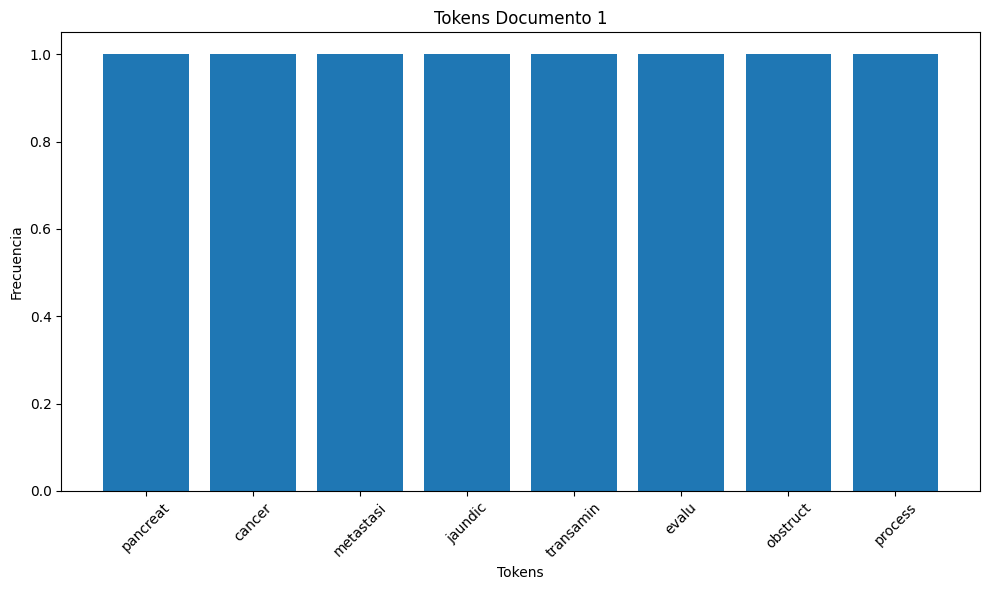

In [252]:
def frecuencias_token(tokens):
    # Creamos un diccionario donde se almacena cada token con su respectiva frecuencia
    token_frequencies = {}
    for token in tokens:
        token_frequencies[token] = token_frequencies.get(token, 0) + 1
    return token_frequencies

# Creamos el diccionario con las frecuencias de los tokens del documento 1
tokens_f1 = frecuencias_token(tokens1)

tokens_sorted_1 = sorted(tokens_f1.items(), key=lambda item: item[1], reverse=True)
top_tokens_normalized_1 = [token for token, freq in tokens_sorted_1]
top_frequencies_normalized_2 = [freq for token, freq in tokens_sorted_1]

plt.figure(figsize=(10, 6))
plt.bar(top_tokens_normalized_1, top_frequencies_normalized_2)
plt.xlabel('Tokens')
plt.ylabel('Frecuencia')
plt.title('Tokens Documento 1')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

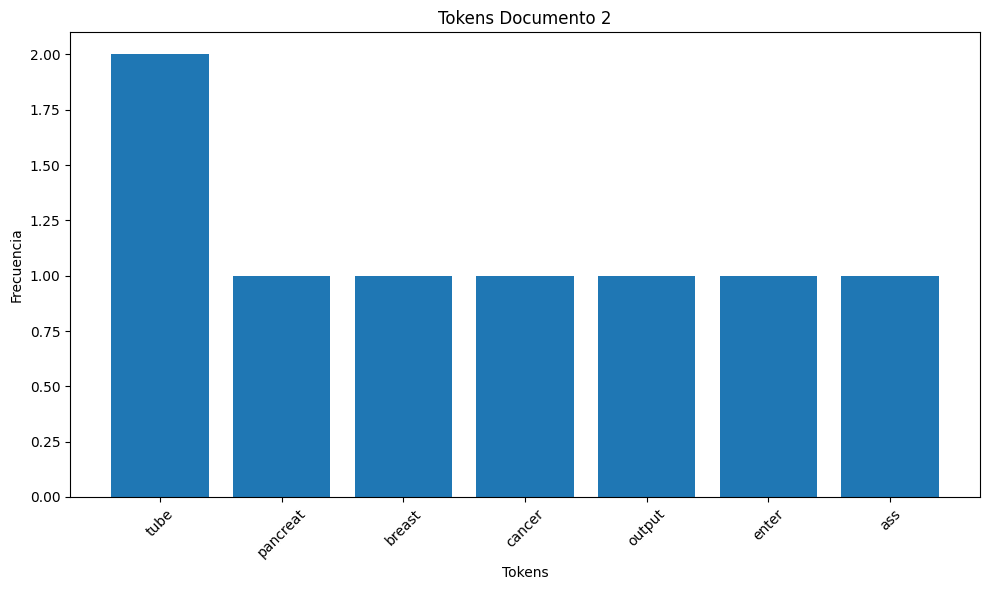

In [253]:
# Creamos el diccionario con las frecuencias de los tokens del documento 2
tokens_f2 = frecuencias_token(tokens2)

tokens_sorted_2 = sorted(tokens_f2.items(), key=lambda item: item[1], reverse=True)
top_tokens_normalized_2 = [token for token, freq in tokens_sorted_2]
top_frequencies_normalized_2 = [freq for token, freq in tokens_sorted_2]

plt.figure(figsize=(10, 6))
plt.bar(top_tokens_normalized_2, top_frequencies_normalized_2)
plt.xlabel('Tokens')
plt.ylabel('Frecuencia')
plt.title('Tokens Documento 2')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

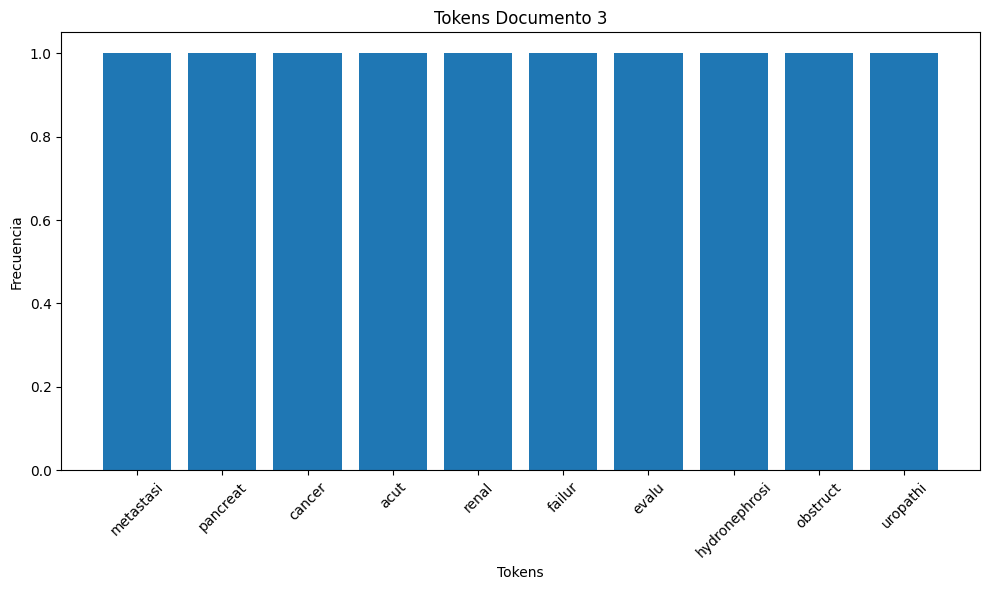

In [254]:
# Creamos el diccionario con las frecuencias de los tokens del documento 3
tokens_f3 = frecuencias_token(tokens3)

tokens_sorted_3 = sorted(tokens_f3.items(), key=lambda item: item[1], reverse=True)
top_tokens_normalized_3 = [token for token, freq in tokens_sorted_3]
top_frequencies_normalized_3 = [freq for token, freq in tokens_sorted_3]

plt.figure(figsize=(10, 6))
plt.bar(top_tokens_normalized_3, top_frequencies_normalized_3)
plt.xlabel('Tokens')
plt.ylabel('Frecuencia')
plt.title('Tokens Documento 3')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3. Generar los vectores para representar numéricamente cada documento de acuerdo con las siguientes técnicas:

a. One Hot Encoding

In [255]:
#Generar lista de documetnos
lista_documentos = [tokens_f1, tokens_f2, tokens_f3]

# Creamos el vocabulario de todos los documentos
vocabulario = set(termino for doc in lista_documentos for termino in doc.keys())


def codificacion_one_hot(documentos, vocabulario):
    # Inicializa el diccionario para almacenar los vectores Codificados en One Hot
    documentos_codificados_one_hot = {}
    # Itera sobre cada documento y crea un vector
    for i, doc in enumerate(documentos, 1):  # Comenzando el índice en 1 para los identificadores de documentos
        # Crea un vector con 1 si el término está presente en el documento, de lo contrario 0
        vector = [1 if termino in doc else 0 for termino in vocabulario]
        documentos_codificados_one_hot[f'doc{i}'] = vector

    return documentos_codificados_one_hot

vectores_one_hot = codificacion_one_hot(lista_documentos, vocabulario)
print("Este es el vocabulario de los documentos:")
print(vocabulario)
print("Estos son los vectores generados en el OHE para los documentos")
print(vectores_one_hot)

Este es el vocabulario de los documentos:
{'cancer', 'obstruct', 'tube', 'hydronephrosi', 'enter', 'metastasi', 'breast', 'output', 'ass', 'acut', 'failur', 'renal', 'transamin', 'evalu', 'uropathi', 'pancreat', 'process', 'jaundic'}
Estos son los vectores generados en el OHE para los documentos
{'doc1': [1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1], 'doc2': [1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0], 'doc3': [1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0]}


b. Cantidad de terminos

In [256]:

def codificacion_cuenta_terminos(documentos, vocabulario):
    # Inicializa el diccionario para almacenar los vectores del Trem Count
    vector_TC = {}
    # Itera sobre cada documento y crea un vector
    for i, doc in enumerate(documentos, 1):  # Comenzando el índice en 1 para los identificadores de documentos
        # Crea un vector con la frecuencia de cada término si está en el documento, de lo contrario 0
        vector = [doc.get(termino, 0) for termino in vocabulario]
        vector_TC[f'doc{i}'] = vector
    return vector_TC

vector_TC = codificacion_cuenta_terminos(lista_documentos, vocabulario)
print("Este es el vocabulario de los documentos:")
print(vocabulario)
print("Estos son los vectores generados en el TC para los documentos")
print(vector_TC)

Este es el vocabulario de los documentos:
{'cancer', 'obstruct', 'tube', 'hydronephrosi', 'enter', 'metastasi', 'breast', 'output', 'ass', 'acut', 'failur', 'renal', 'transamin', 'evalu', 'uropathi', 'pancreat', 'process', 'jaundic'}
Estos son los vectores generados en el TC para los documentos
{'doc1': [1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1], 'doc2': [1, 0, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0], 'doc3': [1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0]}


c. Probabilidad de terminos

In [257]:
#Creamos una funcion para contar el tamaño de la bolsa de palabras
def contar_terminos(bolsa_palabras):
    # Inicializa el contador
    total_terminos = 0
    # Itera sobre cada sublista en la lista principal
    for sublista in bolsa_palabras:
        # Suma la longitud de cada sublista al contador total
        total_terminos += len(sublista)
    return total_terminos

#Creamos una lista con la bolsa de palabras del corpus
bolsa_palabras = [tokens1_copy, tokens2_copy, tokens3_copy]

# Calcula el número total de términos en el corpus
total_terminos = contar_terminos(bolsa_palabras)

def probabilidad_termino(lista_documentos, total_terminos, vocabulario):
    # Inicializa el diccionario para almacenar las probabilidades de los términos por documento
    probabilidades_por_documento = {}
    
    # Itera sobre cada documento para calcular las probabilidades de término
    for i, doc in enumerate(lista_documentos, 1):
        # Inicializa un diccionario para este documento
        probabilidades = dict.fromkeys(vocabulario, 0)
        # Actualiza la probabilidad para los términos que están en el documento
        for term, freq in doc.items():
            probabilidades[term] = freq / total_terminos
        # Asigna la lista de probabilidades al documento correspondiente
        probabilidades_por_documento[f'doc{i}'] = list(probabilidades.values())
    
    return probabilidades_por_documento

probs_termino = probabilidad_termino(lista_documentos, total_terminos, vocabulario)
print("Este es la bolsa de palabras de los documentos:")
print(bolsa_palabras)
print("Esta es la cantidad de palabras en la bolsa de palabras:")
print(total_terminos)
print("Este es el vocabulario de los documentos:")
print(vocabulario)
print("Estos son los vectores generados en la probabilidad de terminos para los documentos")
print(probs_termino)

Este es la bolsa de palabras de los documentos:
[['pancreatic', 'cancer', 'with', 'metastasis', 'jaundice', 'with', 'transaminitis', 'evaluate', 'for', 'obstruction', 'process'], ['pancreatitis', 'breast', 'cancer', 'no', 'output', 'from', 'enteric', 'tube', 'assess', 'tube'], ['metastasis', 'pancreatic', 'cancer', 'acute', 'renal', 'failure', 'evaluate', 'for', 'hydronephrosis', 'or', 'obstructive', 'uropathy']]
Esta es la cantidad de palabras en la bolsa de palabras:
33
Este es el vocabulario de los documentos:
{'cancer', 'obstruct', 'tube', 'hydronephrosi', 'enter', 'metastasi', 'breast', 'output', 'ass', 'acut', 'failur', 'renal', 'transamin', 'evalu', 'uropathi', 'pancreat', 'process', 'jaundic'}
Estos son los vectores generados en la probabilidad de terminos para los documentos
{'doc1': [0.030303030303030304, 0.030303030303030304, 0, 0, 0, 0.030303030303030304, 0, 0, 0, 0, 0, 0, 0.030303030303030304, 0.030303030303030304, 0, 0.030303030303030304, 0.030303030303030304, 0.030303030

d. Term Frequency

In [258]:
def term_f(lista_documentos, vocabulario):
    # Inicializa el diccionario para almacenar las frecuencias de los términos por documento
    frecuencia_doc = {}
    
    # Itera sobre cada documento para calcular las frecuencias de término
    for i, doc in enumerate(lista_documentos, 1):
        # Inicializa un diccionario para este documento
        frecuencias = dict.fromkeys(vocabulario, 0)
        # Calcula el total de términos en el documento actual
        total_terminos_en_documento = sum(doc.values())
        # Actualiza la frecuencia para los términos que están en el documento
        for term, freq in doc.items():
            frecuencias[term] = freq / total_terminos_en_documento
        # Asigna la lista de frecuencias al documento correspondiente
        frecuencia_doc[f'doc{i}'] = list(frecuencias.values())
    
    return frecuencia_doc

frec_term = term_f(lista_documentos, vocabulario)

print("Este es el vocabulario de los documentos:")
print(vocabulario)
print("Estos son los vectores de frecuencia de términos para cada documento:")
print(frec_term)

Este es el vocabulario de los documentos:
{'cancer', 'obstruct', 'tube', 'hydronephrosi', 'enter', 'metastasi', 'breast', 'output', 'ass', 'acut', 'failur', 'renal', 'transamin', 'evalu', 'uropathi', 'pancreat', 'process', 'jaundic'}
Estos son los vectores de frecuencia de términos para cada documento:
{'doc1': [0.125, 0.125, 0, 0, 0, 0.125, 0, 0, 0, 0, 0, 0, 0.125, 0.125, 0, 0.125, 0.125, 0.125], 'doc2': [0.125, 0, 0.25, 0, 0.125, 0, 0.125, 0.125, 0.125, 0, 0, 0, 0, 0, 0, 0.125, 0, 0], 'doc3': [0.1, 0.1, 0, 0.1, 0, 0.1, 0, 0, 0, 0.1, 0.1, 0.1, 0, 0.1, 0.1, 0.1, 0, 0]}


e. IDF